In [2]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax.scipy.linalg import expm
jax.config.update('jax_platform_name', 'cpu')

In [ ]:
M_tx = jnp.array([
    [0., 0., 1.],
    [0., 0., 0.],
    [0., 0., 0.],
])

M_r = jnp.array([
    [0., -1., 0.],
    [1., 0., 0.],
    [0., 0., 0.],
])

In [10]:
M = M_tx * 0. + M_r * jnp.pi
print(expm(M))

[[-1. -0. -0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


In [11]:
M = M_tx * 0. + M_r * jnp.pi * 3
print(expm(M))

[[-1.0000000e+00 -4.1989288e-06  0.0000000e+00]
 [ 4.1989288e-06 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [12]:
M = M_tx * 0.1 + M_r * jnp.pi
print(expm(M))

[[-1.         -0.         -0.        ]
 [ 0.         -1.          0.06366198]
 [ 0.          0.          1.        ]]


In [13]:
M = M_tx * 0.1 + M_r * jnp.pi*3
print(expm(M))

[[-1.0000000e+00 -4.1989288e-06  4.3772161e-08]
 [ 4.1989288e-06 -1.0000000e+00  2.1220658e-02]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [15]:
print(expm(M_tx * 0.1) * expm(M_r * jnp.pi*3))

[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


In [31]:
for mul in [0, 1/4, 1/2, 3/4, 1, 5/4, 3/2, 7/4, 2]:
    M = M_tx * 0.5 + M_r * jnp.pi * mul
    eM = expm(M)
    print(f">>> mul={mul:.2f}, x={eM[0, 2]:+.2f}, y={eM[1, 2]:+.2f}, mag={jnp.sqrt(eM[0, 2]**2 + eM[1, 2]**2):.2f}, cos={eM[0, 0]:+.2f}, sin={eM[1, 0]:+.2f}")


>>> mul=0.00, x=+0.50, y=+0.00, mag=0.50, cos=+1.00, sin=+0.00
>>> mul=0.25, x=+0.45, y=+0.19, mag=0.49, cos=+0.71, sin=+0.71
>>> mul=0.50, x=+0.32, y=+0.32, mag=0.45, cos=+0.00, sin=+1.00
>>> mul=0.75, x=+0.15, y=+0.36, mag=0.39, cos=-0.71, sin=+0.71
>>> mul=1.00, x=-0.00, y=+0.32, mag=0.32, cos=-1.00, sin=+0.00
>>> mul=1.25, x=-0.09, y=+0.22, mag=0.24, cos=-0.71, sin=-0.71
>>> mul=1.50, x=-0.11, y=+0.11, mag=0.15, cos=-0.00, sin=-1.00
>>> mul=1.75, x=-0.06, y=+0.03, mag=0.07, cos=+0.71, sin=-0.71
>>> mul=2.00, x=-0.00, y=-0.00, mag=0.00, cos=+1.00, sin=-0.00


In [32]:
import numpy as np
import torch
from torchdiffeq import odeint

def _pytorch_expm(A, rtol=1e-4):
    I = torch.eye(A.shape[-1], device=A.device, dtype=A.dtype)
    return odeint(
        lambda t, x: A @ x, I, torch.tensor([0.0, 1.0]).to(A.device, A.dtype), rtol=rtol
    )[-1]

for mul in [0, 1/4, 1/2, 3/4, 1, 5/4, 3/2, 7/4, 2]:
    M = M_tx * 0.5 + M_r * jnp.pi * mul
    eM = torch.matrix_exp(torch.from_numpy(np.array(M))).numpy()
    print(f"mul={mul:.2f}, x={eM[0, 2]:+.2f}, y={eM[1, 2]:+.2f}, mag={jnp.sqrt(eM[0, 2]**2 + eM[1, 2]**2):.2f} cos={eM[0, 0]:+.2f}, sin={eM[1, 0]:+.2f}")

mul=0.00, x=+0.50, y=+0.00, mag=0.50 cos=+1.00, sin=+0.00
mul=0.25, x=+0.45, y=+0.19, mag=0.49 cos=+0.71, sin=+0.71
mul=0.50, x=+0.32, y=+0.32, mag=0.45 cos=+0.00, sin=+1.00
mul=0.75, x=+0.15, y=+0.36, mag=0.39 cos=-0.71, sin=+0.71
mul=1.00, x=-0.00, y=+0.32, mag=0.32 cos=-1.00, sin=+0.00
mul=1.25, x=-0.09, y=+0.22, mag=0.24 cos=-0.71, sin=-0.71
mul=1.50, x=-0.11, y=+0.11, mag=0.15 cos=-0.00, sin=-1.00
mul=1.75, x=-0.06, y=+0.03, mag=0.07 cos=+0.71, sin=-0.71
mul=2.00, x=+0.00, y=-0.00, mag=0.00 cos=+1.00, sin=+0.00


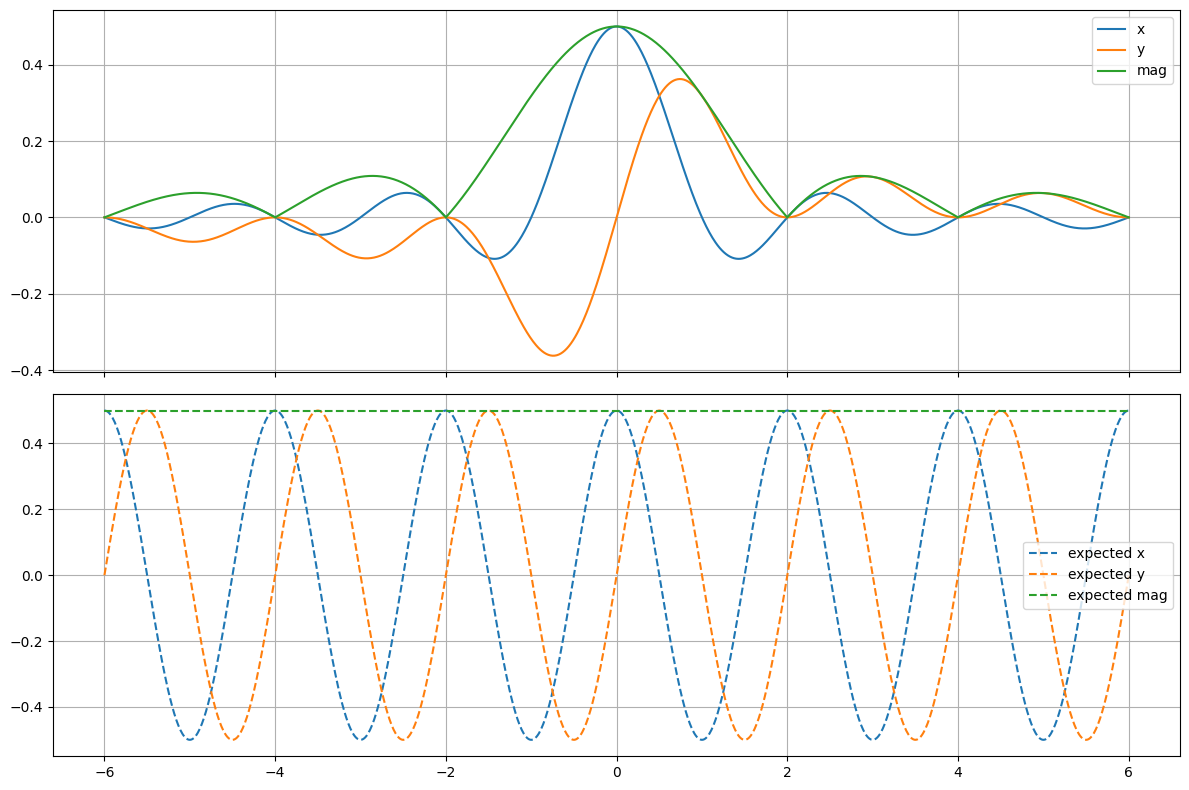

In [87]:
xs = []
ys = []
mags = []
expected_xs = []
expected_ys = []
expected_mags = []
mag = 0.5
upper = 6
muls = np.linspace(-upper, upper, 1000)

mag_fn = lambda x, y: jnp.sqrt(x**2 + y**2)

for mul in muls:
    M = M_tx * mag + M_r * jnp.pi * mul
    eM = torch.matrix_exp(torch.from_numpy(np.array(M))).numpy()

    xs.append(eM[0, 2])
    ys.append(eM[1, 2])
    mags.append(mag_fn(eM[0, 2], eM[1, 2]))

    # calculate the expected values of x and y given the angle 
    expected_xs.append(np.cos(mul * np.pi) * mag)
    expected_ys.append(np.sin(mul * np.pi) * mag)
    expected_mags.append(mag_fn(expected_xs[-1], expected_ys[-1]))

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(muls, xs, label="x")
axs[0].plot(muls, ys, label="y")
axs[0].plot(muls, mags, label="mag")
# axs[0].plot(muls, jnp.sinc(muls) * mag, label="sinc", linestyle="-.", alpha=0.75)
axs[0].legend()
axs[0].grid()


axs[1].plot(muls, expected_xs, label="expected x", linestyle="--", c="C0")
axs[1].plot(muls, expected_ys, label="expected y", linestyle="--", c="C1")
axs[1].plot(muls, expected_mags, label="expected mag", linestyle="--", c="C2")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()